In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from collections import Counter 
import itertools

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [34]:
#Loading csv file

dataframe = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
dataframe.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [11]:
dataframe.isnull().values.any()

np.False_

In [12]:
dataframe["target"].describe()

count    1000.000000
mean        0.580000
std         0.493805
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [13]:
dataframe = dataframe.drop(['patientid'], axis=1)

In [14]:
non_disease = len(dataframe[dataframe.target == 0])
disease = len(dataframe[dataframe.target == 1])
disease_percent = (disease / (disease + non_disease)) * 100

print("Number of People without Heart Disease: ", non_disease)
print("Number of People with Heart Disease: ", disease)
print("Percentage of Heart Disease: {:.4f}".format(disease_percent))

Number of People without Heart Disease:  420
Number of People with Heart Disease:  580
Percentage of Heart Disease: 58.0000


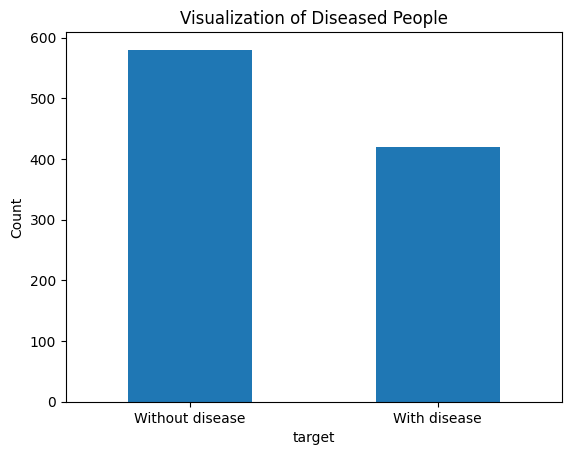

In [15]:
labels = ["Without disease", "With disease"]
count_classes = dataframe.value_counts(dataframe['target'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Diseased People")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataframe["Normalizedtarget"] = scaler.fit_transform(dataframe["target"].values.reshape(-1, 1))
Y = dataframe["target"]
X = dataframe.drop(["target"], axis= 1)

In [18]:
X.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,Normalizedtarget
0,53,1,2,171,0,0,1,147,0,5.3,3,3,0.850963
1,40,1,0,94,229,0,1,115,0,3.7,1,1,-1.175139
2,49,1,2,133,142,0,0,202,1,5.0,1,0,-1.175139
3,43,1,0,138,295,1,1,153,0,3.2,2,2,0.850963
4,31,1,1,199,0,0,2,136,0,5.3,3,2,0.850963


In [19]:
X = X.drop(['Normalizedtarget'], axis=1)

In [20]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: target, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)
print("Shape of train_Y: ", test_Y.shape)
print("Shape of test_Y: ", test_Y.shape)

Shape of train_X:  (700, 12)
Shape of test_X:  (300, 12)
Shape of train_Y:  (300,)
Shape of test_Y:  (300,)


In [22]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators= 100)

In [23]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  98.66666666666667
Decision Tree Score:  97.66666666666667


In [24]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [25]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion Matrix - Decision Tree
[[132   6]
 [  1 161]]
Confusion matrix, without normalization


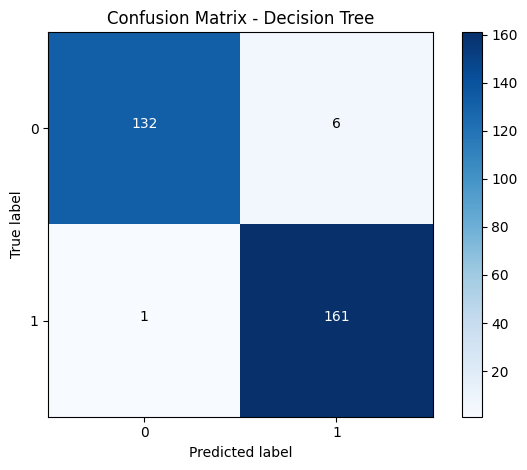

In [26]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(train_X, train_Y)

RandomForestClassifier(random_state=42)

In [28]:
pred_Y = rf_model.predict(test_X)

In [29]:
from sklearn.metrics import classification_report
accuracy = accuracy_score(test_Y, pred_Y)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(test_Y, pred_Y))


Model Accuracy: 98.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       0.99      0.99      0.99       162

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [30]:
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(rf_model, 'heart_disease_rf_model.pkl')


['heart_disease_rf_model.pkl']

In [31]:
!streamlit version

Streamlit, version 1.39.0


In [32]:
train_X.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
541,71,1,2,186,544,1,1,150,1,4.3,3,3
440,70,1,1,196,404,1,0,130,1,1.2,3,1
482,77,1,0,110,254,0,0,186,0,2.0,1,1
422,36,1,1,132,307,0,0,175,0,5.3,0,0
778,76,1,2,135,325,0,0,120,0,2.3,0,0


In [33]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.0.102:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
^C
  Stopping...


In [ ]:
train_X